## Import Library

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt

# import required libraries for clustering
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score
from sklearn.metrics import pairwise_distances
from mpl_toolkits.mplot3d import Axes3D
from sklearn.datasets import make_blobs
from sklearn.decomposition import PCA
from google.colab import files

## Read data

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
df = pd.read_csv('/content/gdrive/MyDrive/Dataset skripsi/Data Paling Baru.csv')
df.head()

,Tanggal,No Transaksi,Kode Pel.,Nama Pelanggan,Jumlah Produk,Sub Total,Laba Jual
0,03/01/2022,2245/JL/UTM/0122,PL0126,MB DEWI OLSHOP,237.0,35823000.0,1228550.0
1,03/01/2022,2246/JL/UTM/0122,PL0063,ARGOPURO TK (BP UMAR),5.0,1462500.0,20000.0
2,03/01/2022,2251/JL/UTM/0122,PL0121,AJS STORE,11.0,2315000.0,82470.0
3,04/01/2022,2247/JL/UTM/0122,PL0182,ENI TK,33.0,8705000.0,467979.0
4,04/01/2022,2248/JL/UTM/0122,PL0108,BU ANNE,14.0,815000.0,131104.0


In [ ]:
df.shape

(2107, 7)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2107 entries, 0 to 2106
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Tanggal         2106 non-null   object 
 1   No Transaksi    2107 non-null   object 
 2   Kode Pel.       2107 non-null   object 
 3   Nama Pelanggan  2106 non-null   object 
 4   Jumlah Produk   2105 non-null   float64
 5   Sub Total       2096 non-null   float64
 6   Laba Jual       2097 non-null   float64
dtypes: float64(3), object(4)
memory usage: 115.4+ KB


# Data Preparation

## Handling Missing and Duplicate data

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2107 entries, 0 to 2106
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Tanggal         2106 non-null   object 
 1   No Transaksi    2107 non-null   object 
 2   Kode Pel.       2107 non-null   object 
 3   Nama Pelanggan  2106 non-null   object 
 4   Jumlah Produk   2105 non-null   float64
 5   Sub Total       2096 non-null   float64
 6   Laba Jual       2097 non-null   float64
dtypes: float64(3), object(4)
memory usage: 115.4+ KB


In [ ]:
#check null values
jml_null = df.isnull().sum()
print("Jumlah data null sebelum dihapus\n", jml_null)

#check duplicate lines
jml_dup = df.duplicated().sum()
print("Jumlah data duplikat sebelum dihapus\n", jml_dup)

#drop null values
df = df.dropna()

#drop duplicate lines
df = df.drop_duplicates()

#recheck null values
jml_null = df.isnull().sum()
print("Jumlah data null setelah dihapus\n", jml_null)

#recheck duplicate lines
jml_dup = df.duplicated().sum()
print("Jumlah data duplikat setelah dihapus\n", jml_dup)

Jumlah data null sebelum dihapus
 Tanggal            1
No Transaksi       0
Kode Pel.          0
Nama Pelanggan     1
Jumlah Produk      2
Sub Total         11
Laba Jual         10
dtype: int64
Jumlah data duplikat sebelum dihapus
 8
Jumlah data null setelah dihapus
 Tanggal           0
No Transaksi      0
Kode Pel.         0
Nama Pelanggan    0
Jumlah Produk     0
Sub Total         0
Laba Jual         0
dtype: int64
Jumlah data duplikat setelah dihapus
 0


## Drop Columns

In [ ]:
#set column names to delete
drop_cols = df[['Nama Pelanggan', 'Laba Jual']]

#delete columns
new_df = df.drop(drop_cols, axis =1)
new_df

,Tanggal,No Transaksi,Kode Pel.,Jumlah Produk,Sub Total
0,03/01/2022,2245/JL/UTM/0122,PL0126,237.0,35823000.0
1,03/01/2022,2246/JL/UTM/0122,PL0063,5.0,1462500.0
2,03/01/2022,2251/JL/UTM/0122,PL0121,11.0,2315000.0
3,04/01/2022,2247/JL/UTM/0122,PL0182,33.0,8705000.0
4,04/01/2022,2248/JL/UTM/0122,PL0108,14.0,815000.0
...,...,...,...,...,...
2102,31/12/2022,4281/JL/UTM/1222,PL0002,188.0,10450000.0
2103,31/12/2022,4282/JL/UTM/1222,PL0002,68.0,5236000.0
2104,31/12/2022,4269/JL/UTM/1222,PL0159,210.0,8520000.0
2105,31/12/2022,4285/JL/UTM/1222,PL0355,600.0,12251000.0


## Adjust Data Dtype

In [ ]:
df['Tanggal'] = pd.to_datetime(df['Tanggal'])
df['Tanggal'] = df['Tanggal'].dt.strftime('%d/%m/%Y')
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2089 entries, 0 to 2106
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Tanggal         2089 non-null   object 
 1   No Transaksi    2089 non-null   object 
 2   Kode Pel.       2089 non-null   object 
 3   Nama Pelanggan  2089 non-null   object 
 4   Jumlah Produk   2089 non-null   float64
 5   Sub Total       2089 non-null   float64
 6   Laba Jual       2089 non-null   float64
dtypes: float64(3), object(4)
memory usage: 130.6+ KB


<ipython-input-9-a5631ec71d01>:1: UserWarning: Parsing dates in DD/MM/YYYY format when dayfirst=False (the default) was specified. This may lead to inconsistently parsed dates! Specify a format to ensure consistent parsing.
  df['Tanggal'] = pd.to_datetime(df['Tanggal'])


In [ ]:
df.head()

,Tanggal,No Transaksi,Kode Pel.,Nama Pelanggan,Jumlah Produk,Sub Total,Laba Jual
0,01/03/2022,2245/JL/UTM/0122,PL0126,MB DEWI OLSHOP,237.0,35823000.0,1228550.0
1,01/03/2022,2246/JL/UTM/0122,PL0063,ARGOPURO TK (BP UMAR),5.0,1462500.0,20000.0
2,01/03/2022,2251/JL/UTM/0122,PL0121,AJS STORE,11.0,2315000.0,82470.0
3,01/04/2022,2247/JL/UTM/0122,PL0182,ENI TK,33.0,8705000.0,467979.0
4,01/04/2022,2248/JL/UTM/0122,PL0108,BU ANNE,14.0,815000.0,131104.0


## Measuring volume

In [ ]:
# Calculate the number of transactions made by customers in a day
df_per_day = new_df.groupby(['Tanggal', 'Kode Pel.']).size().reset_index(name='Jumlah Transaksi Per Hari')

# Calculate the number of products purchased by customers in a day
df_per_day['Jumlah Produk Per Hari'] = new_df.groupby(['Tanggal', 'Kode Pel.'])['Jumlah Produk'].sum().values

# Calculate the average number of products purchased by customers per day
df_per_day['Rata-rata per hari'] = df_per_day['Jumlah Produk Per Hari'] / df_per_day['Jumlah Transaksi Per Hari']
print(df_per_day,"\n")

# Calculate volume
jumlah_hari = df_per_day.groupby('Kode Pel.')['Tanggal'].nunique()
jumlah_rerata = df_per_day.groupby('Kode Pel.')['Rata-rata per hari'].sum()
lrfmv_v_col = (jumlah_rerata / jumlah_hari).reset_index(name='Volume')

lrfmv_v_col.columns = ['CustomerID', 'Volume']
lrfmv_v_col.head(20)

         Tanggal Kode Pel.  Jumlah Transaksi Per Hari  Jumlah Produk Per Hari  \
0     01/02/2022    PL0030                          1                    31.0   
1     01/02/2022    PL0465                          1                     1.0   
2     01/02/2022    PL0466                          1                     6.0   
3     01/03/2022    PL0034                          1                    10.0   
4     01/03/2022    PL0096                          1                    14.0   
...          ...       ...                        ...                     ...   
1943  31/12/2022    PL0199                          1                   426.0   
1944  31/12/2022    PL0351                          1                    13.0   
1945  31/12/2022    PL0355                          1                   600.0   
1946  31/12/2022    PL0356                          1                    70.0   
1947  31/12/2022    PL0362                          1                    28.0   

      Rata-rata per hari  


,CustomerID,Volume
0,PL0002,152.294118
1,PL0003,2324.280303
2,PL0004,43.000000
3,PL0005,92.312500
4,PL0006,104.000000
5,PL0011,190.666667
6,PL0012,56.326923
7,PL0013,35.284722
8,PL0014,155.200000
9,PL0017,51.083333


## Measuring Frequency

In [ ]:
# calculate the transaction frequency of each customer
lrfmv_f = new_df.groupby('Kode Pel.')['No Transaksi'].count()

lrfmv_f_col = lrfmv_f.reset_index()
lrfmv_f_col.columns = ['CustomerID', 'Frequency']
lrfmv_f_col.head()

,CustomerID,Frequency
0,PL0002,21
1,PL0003,52
2,PL0004,7
3,PL0005,9
4,PL0006,1


## Measuring Monetary

In [ ]:
# Calculate amount of money spent by each customers
lrfmv_m = new_df.groupby('Kode Pel.')['Sub Total'].sum()
lrfmv_m = lrfmv_m / lrfmv_f

lrfmv_m_col = lrfmv_m.reset_index()
lrfmv_m_col.columns = ['CustomerID', 'Monetary']
lrfmv_m_col.head()

,CustomerID,Monetary
0,PL0002,7.133000e+06
1,PL0003,8.701781e+07
2,PL0004,2.157786e+06
3,PL0005,4.011222e+06
4,PL0006,3.520000e+06


## Measuring Recency

In [ ]:
new_df['Tanggal'] = pd.to_datetime(new_df['Tanggal'])
max_date = max(new_df['Tanggal'])

new_df['Selisih'] = max_date - new_df['Tanggal']

lrfmv_r = new_df.groupby('Kode Pel.')['Selisih'].min()

lrfmv_r_col = lrfmv_r.reset_index()
lrfmv_r_col.columns = ['CustomerID', 'Recency']
lrfmv_r_col['Recency'] = lrfmv_r_col['Recency'].dt.days
lrfmv_r_col

<ipython-input-14-01be610bef10>:1: UserWarning: Parsing dates in DD/MM/YYYY format when dayfirst=False (the default) was specified. This may lead to inconsistently parsed dates! Specify a format to ensure consistent parsing.
  new_df['Tanggal'] = pd.to_datetime(new_df['Tanggal'])


,CustomerID,Recency
0,PL0002,0
1,PL0003,1
2,PL0004,27
3,PL0005,36
4,PL0006,152
...,...,...
449,PL0633,187
450,PL0634,184
451,PL0635,187
452,PL0636,186


## Measuring Length

In [ ]:
new_df['Tanggal'] = pd.to_datetime(new_df['Tanggal'])
lrfmv_l = new_df.groupby('Kode Pel.')['Tanggal'].agg(['min','max']).rename(columns={'min':'first','max':'last'})
lrfmv_l['Length'] = lrfmv_l['last'] - lrfmv_l['first']
lrfmv_l = lrfmv_l.drop(columns=['first','last'], axis =1)

lrfmv_l_col = lrfmv_l.reset_index()
lrfmv_l_col.columns = ['CustomerID', 'Length']
lrfmv_l_col['Length'] = lrfmv_l_col['Length'].dt.days
lrfmv_l_col

,CustomerID,Length
0,PL0002,354
1,PL0003,357
2,PL0004,307
3,PL0005,306
4,PL0006,0
...,...,...
449,PL0633,0
450,PL0634,145
451,PL0635,0
452,PL0636,0


In [ ]:
lrfmv1 = pd.merge(lrfmv_l_col, lrfmv_r_col, on='CustomerID', how='inner')
lrfmv2 = pd.merge(lrfmv_f_col, lrfmv_m_col, on= 'CustomerID', how='inner')
lrfmv3 = pd.merge(lrfmv1, lrfmv2, on='CustomerID', how='inner')
lrfmv_table = pd.merge(lrfmv3, lrfmv_v_col, on='CustomerID', how='inner')
lrfmv_table.head()

,CustomerID,Length,Recency,Frequency,Monetary,Volume
0,PL0002,354,0,21,7.133000e+06,152.294118
1,PL0003,357,1,52,8.701781e+07,2324.280303
2,PL0004,307,27,7,2.157786e+06,43.000000
3,PL0005,306,36,9,4.011222e+06,92.312500
4,PL0006,0,152,1,3.520000e+06,104.000000


In [ ]:
lrfmv_table.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 454 entries, 0 to 453
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   CustomerID  454 non-null    object 
 1   Length      454 non-null    int64  
 2   Recency     454 non-null    int64  
 3   Frequency   454 non-null    int64  
 4   Monetary    454 non-null    float64
 5   Volume      454 non-null    float64
dtypes: float64(2), int64(3), object(1)
memory usage: 24.8+ KB


In [ ]:
data_olah = lrfmv_table.drop('CustomerID', axis=1)
data_olah

,Length,Recency,Frequency,Monetary,Volume
0,354,0,21,7.133000e+06,152.294118
1,357,1,52,8.701781e+07,2324.280303
2,307,27,7,2.157786e+06,43.000000
3,306,36,9,4.011222e+06,92.312500
4,0,152,1,3.520000e+06,104.000000
...,...,...,...,...,...
449,0,187,1,2.000000e+04,2.000000
450,145,184,3,3.833333e+05,4.000000
451,0,187,1,1.600000e+05,1.000000
452,0,186,1,2.360000e+05,2.000000


## Normalisasi

In [ ]:
X = data_olah

minmax_scaler = MinMaxScaler()
data_olah_scaled = minmax_scaler.fit_transform(X)
data_olah_scaled = pd.DataFrame(data_olah_scaled)

data_olah_scaled.head()

,0,1,2,3,4
0,0.977901,0.000000,0.125786,0.073693,0.065121
1,0.986188,0.002755,0.320755,0.901320,1.000000
2,0.848066,0.074380,0.037736,0.022148,0.018078
3,0.845304,0.099174,0.050314,0.041350,0.039303
4,0.000000,0.418733,0.000000,0.036261,0.044334


In [ ]:
# data_olah_scaled_with_customerid = data_olah_scaled
# data_olah_scaled_with_customerid.rename(columns={0 : 'Length', 1: 'Recency', 2: 'Frequency', 3 : 'Monetary', 4 : 'Volume'}, inplace=True)
# data_olah_scaled_with_customerid['CustomerID'] = lrfmv_table['CustomerID']

# new_columns = ['CustomerID', 'Length', 'Recency', 'Frequency', 'Monetary', 'Volume']
# data_olah_scaled_with_customerid = data_olah_scaled_with_customerid[new_columns]
# data_olah_scaled_with_customerid.head()

# Modeling

## Based on Literature

In [ ]:
# eps and minpts based on literature
epsilon = [0.1, 0.2, 0.3, 0.4, 0.5, 0.6]
eps = []
minpts = []
avg_score = []
cluster = []
noise = []

distance_array = pairwise_distances(data_olah_scaled, metric='cosine')
for x in epsilon:
  for y in range(2,11):
    clustering = DBSCAN(eps=x, min_samples=y, metric='precomputed').fit(distance_array)
    no_clusters = len(np.unique(clustering.labels_))
    no_noise = np.sum(np.array(clustering.labels_) == -1, axis=0)
    try:
      score = silhouette_score(data_olah_scaled, clustering.labels_)
    except ValueError:
      score = -9999
    eps.append(x)
    minpts.append(y)
    avg_score.append(score)
    cluster.append(no_clusters)
    noise.append(no_noise)

results = pd.DataFrame({'minpts' : minpts,
                                 'eps' : eps,
                                 'no_cluster' : cluster,
                                 'no_noise' : noise,
                                 'silhouette_score' : avg_score})
results

,minpts,eps,no_cluster,no_noise,silhouette_score
0,2,0.1,2,3,0.520604
1,3,0.1,2,3,0.520604
2,4,0.1,2,3,0.520604
3,5,0.1,2,3,0.520604
4,6,0.1,2,3,0.520604
5,7,0.1,2,3,0.520604
6,8,0.1,2,3,0.520604
7,9,0.1,2,3,0.520604
8,10,0.1,2,3,0.520604
9,2,0.2,1,0,-9999.000000


In [ ]:
print(f"Maksimal score terletak pada index : {avg_score.index(max(avg_score))}")
print(f"Besar epsilon : {eps[avg_score.index(max(avg_score))]}")
print(f"Besar minpts : {minpts[avg_score.index(max(avg_score))]}")
print(f"Jumlah cluster : {cluster[avg_score.index(max(avg_score))]}")
print(f"Jumlah noise : {noise[avg_score.index(max(avg_score))]}")
print(f"Silhouette score : {avg_score[avg_score.index(max(avg_score))]}")

Maksimal score terletak pada index : 0
Besar epsilon : 0.1
Besar minpts : 2
Jumlah cluster : 2
Jumlah noise : 3
Silhouette score : 0.5206036833738057


## Iteration

In [ ]:
# pairwise distance minmax scaler
distance_array = pairwise_distances(data_olah_scaled, metric='cosine') #hitung jarak
data_distance = distance_array[np.triu_indices(distance_array.shape[0],1)] #ambil segitiga atas, supaya gak berulang
max_value = data_distance.max()
min_value = data_distance.min()
mean_value = data_distance.mean()
print(f'max_value : {max_value}')
print(f'min_value : {min_value}')
print(f'mean_value : {mean_value}')

max_value : 0.9999985584102208
min_value : 0.0
mean_value : 0.3618033877941155


In [ ]:
if round(min_value, 2) == 0.0:
  lower = int((round(min_value, 2)*100) + 1) #batas bawah dan atas gak boleh 0
else:
  lower = int((round(min_value, 2)*100))
upper = int((round(max_value, 2)*100) + 1)
lower

1

In [ ]:
epsilon = [i/100 for i in range(lower,upper,1)]
eps = []
minpts = []
avg_score = []
cluster = []
noise = []

for x in epsilon:
  for y in range(2,71):
    clustering = DBSCAN(eps=x, min_samples=y, metric='precomputed').fit(distance_array)
    no_clusters = len(np.unique(clustering.labels_))
    no_noise = np.sum(np.array(clustering.labels_) == -1, axis=0)
    try:
      score = silhouette_score(data_olah_scaled, clustering.labels_)
    except ValueError:
      score = -9999
    eps.append(x)
    minpts.append(y)
    avg_score.append(score)
    cluster.append(no_clusters)
    noise.append(no_noise)

results_2 = pd.DataFrame({'minpts' : minpts,
                                 'eps' : eps,
                                 'no_cluster' : cluster,
                                 'no_noise' : noise,
                                 'silhouette_score' : avg_score})
results_2

,minpts,eps,no_cluster,no_noise,silhouette_score
0,2,0.01,6,14,-0.206808
1,3,0.01,4,18,-0.018476
2,4,0.01,2,24,0.243102
3,5,0.01,2,24,0.243102
4,6,0.01,2,26,0.247828
...,...,...,...,...,...
6895,66,1.00,1,0,-9999.000000
6896,67,1.00,1,0,-9999.000000
6897,68,1.00,1,0,-9999.000000
6898,69,1.00,1,0,-9999.000000


In [ ]:
print(f"Skor terletak pada index : {avg_score.index(max(avg_score))}")
print(f"Besar epsilon : {eps[avg_score.index(max(avg_score))]}")
print(f"Besar minpts : {minpts[avg_score.index(max(avg_score))]}")
print(f"Jumlah cluster : {cluster[avg_score.index(max(avg_score))]}")
print(f"Jumlah noise : {noise[avg_score.index(max(avg_score))]}")
print(f"Silhouette score : {avg_score[avg_score.index(max(avg_score))]}")

Skor terletak pada index : 480
Besar epsilon : 0.07
Besar minpts : 68
Jumlah cluster : 3
Jumlah noise : 11
Silhouette score : 0.5731851294004627


## Clustering

In [ ]:
distance_array = pairwise_distances(data_olah_scaled, metric='cosine')
# len(distance_array[1])
clustering = DBSCAN(eps=0.07, min_samples=68, metric='precomputed').fit(distance_array)
no_clusters = len(np.unique(clustering.labels_))
no_noise = np.sum(np.array(clustering.labels_) == -1, axis=0)
score = silhouette_score(distance_array, clustering.labels_)
score
clustering.labels_

array([ 0, -1,  0,  0,  1,  0,  0,  0,  0,  0,  1,  0, -1,  0,  0,  0,  0,
        1,  0,  0,  0,  0,  0,  1,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  1,  0,  0,  0,  0,  0,  0,  0,  0,  0, -1,
        0,  0,  0,  1,  0,  1,  0,  0,  0,  0, -1,  0,  0,  0,  1,  0,  0,
        1,  0,  1,  0, -1,  0,  0,  0,  1,  1,  0,  0,  0,  0,  0,  1,  0,
        1,  0,  0,  0,  0,  0,  0,  0,  0,  0, -1,  0,  1,  0,  1,  1,  1,
        0,  0,  1,  1,  1,  1,  1,  0,  0,  0,  0,  0,  0,  0,  1,  1,  0,
        1,  1,  0,  1, -1,  0,  0,  0,  0,  1,  0,  1,  0,  1,  1,  0,  0,
        1,  0,  0,  1,  0,  0,  1,  1,  1,  1,  1,  1,  1,  0,  1,  1,  0,
        0,  0,  1,  1,  1,  0,  1,  0,  0,  1,  0,  0, -1,  0,  0,  1,  0,
        0,  0,  0,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  0,  0, -1,  1,
        0,  1,  1,  0,  0,  1,  1,  1,  1,  1,  1,  1,  1,  0,  0,  0,  1,
        1,  0,  0,  1,  1

In [ ]:
hasil_clustering = data_olah
hasil_clustering['Label'] = ''
hasil_clustering['CustomerID'] = ''

In [ ]:
new_cols = ['CustomerID', 'Length', 'Recency', 'Frequency', 'Monetary', 'Volume', 'Label']

hasil_clustering = hasil_clustering[new_cols]

In [ ]:
for index, row in hasil_clustering.iterrows():
  hasil_clustering["Label"][index] = clustering.labels_[index]
  hasil_clustering['CustomerID'][index] = lrfmv_table['CustomerID'][index]

<ipython-input-30-18d783ad0f8b>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  hasil_clustering["Label"][index] = clustering.labels_[index]
<ipython-input-30-18d783ad0f8b>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  hasil_clustering['CustomerID'][index] = lrfmv_table['CustomerID'][index]


In [ ]:
hasil_clustering

,CustomerID,Length,Recency,Frequency,Monetary,Volume,Label
0,PL0002,354,0,21,7.133000e+06,152.294118,0
1,PL0003,357,1,52,8.701781e+07,2324.280303,-1
2,PL0004,307,27,7,2.157786e+06,43.000000,0
3,PL0005,306,36,9,4.011222e+06,92.312500,0
4,PL0006,0,152,1,3.520000e+06,104.000000,1
...,...,...,...,...,...,...,...
449,PL0633,0,187,1,2.000000e+04,2.000000,1
450,PL0634,145,184,3,3.833333e+05,4.000000,0
451,PL0635,0,187,1,1.600000e+05,1.000000,1
452,PL0636,0,186,1,2.360000e+05,2.000000,1


In [ ]:
data_olah_scaled_clv = data_olah_scaled
data_olah_scaled_clv['Label'] = ''

In [ ]:
for index, row in data_olah_scaled_clv.iterrows():
  data_olah_scaled_clv["Label"][index] = clustering.labels_[index]

<ipython-input-33-750f6d495532>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_olah_scaled_clv["Label"][index] = clustering.labels_[index]


In [ ]:
data_olah_scaled_clv

,0,1,2,3,4,Label
0,0.977901,0.000000,0.125786,0.073693,0.065121,0
1,0.986188,0.002755,0.320755,0.901320,1.000000,-1
2,0.848066,0.074380,0.037736,0.022148,0.018078,0
3,0.845304,0.099174,0.050314,0.041350,0.039303,0
4,0.000000,0.418733,0.000000,0.036261,0.044334,1
...,...,...,...,...,...,...
449,0.000000,0.515152,0.000000,0.000000,0.000430,1
450,0.400552,0.506887,0.012579,0.003764,0.001291,0
451,0.000000,0.515152,0.000000,0.001450,0.000000,1
452,0.000000,0.512397,0.000000,0.002238,0.000430,1


In [ ]:
# Menampilkan DataFrame dengan nilai 'Label' = '0'
hasil_clustering_filtered_1 = hasil_clustering.loc[hasil_clustering['Label'] == 0]
hasil_clustering_filtered_1

,CustomerID,Length,Recency,Frequency,Monetary,Volume,Label
0,PL0002,354,0,21,7.133000e+06,152.294118,0
2,PL0004,307,27,7,2.157786e+06,43.000000,0
3,PL0005,306,36,9,4.011222e+06,92.312500,0
5,PL0011,176,171,3,1.016000e+07,190.666667,0
6,PL0012,317,38,28,4.150607e+06,56.326923,0
...,...,...,...,...,...,...,...
295,PL0418,94,116,2,4.975000e+05,2.500000,0
320,PL0456,149,186,2,6.068750e+05,2.000000,0
350,PL0505,126,58,2,2.025000e+05,1.500000,0
375,PL0534,219,88,2,6.815000e+05,7.500000,0


In [ ]:
hcf_1 = hasil_clustering_filtered_1.drop("CustomerID", axis=1)
min_values_1 = hcf_1.min()
max_values_1 = hcf_1.max()
mean_values_1 = hcf_1.mean()
total_monetary_1 = hcf_1["Monetary"].sum()

print(f"Nilai minimum:\n {min_values_1} \n")
print(f"Nilai maximum:\n {max_values_1} \n")
print(f"Nilai rata-rata:\n {mean_values_1} \n")
print(f"Total Monetary:\n {total_monetary_1} \n")

Nilai minimum:
 Length             33
Recency             0
Frequency           2
Monetary     202500.0
Volume            1.5
Label               0
dtype: object 

Nilai maximum:
 Length                   358
Recency                  186
Frequency                 52
Monetary     49621428.571429
Volume            552.222222
Label                      0
dtype: object 

Nilai rata-rata:
 Length       2.399697e+02
Recency      5.480606e+01
Frequency    9.187879e+00
Monetary     5.862817e+06
Volume       6.644498e+01
Label        0.000000e+00
dtype: float64 

Total Monetary:
 967364793.7017858 



In [ ]:
# Menampilkan DataFrame dengan nilai 'Label' = '1'
hasil_clustering_filtered_2 = hasil_clustering.loc[hasil_clustering['Label'] == 1]
hasil_clustering_filtered_2

,CustomerID,Length,Recency,Frequency,Monetary,Volume,Label
4,PL0006,0,152,1,3.520000e+06,104.000000,1
10,PL0020,93,225,3,1.717333e+06,77.333333,1
17,PL0033,0,122,1,1.080000e+06,12.000000,1
23,PL0040,0,315,1,1.365000e+06,13.000000,1
57,PL0100,0,281,1,1.870000e+06,44.000000,1
...,...,...,...,...,...,...,...
448,PL0631,0,187,1,3.100000e+05,2.000000,1
449,PL0633,0,187,1,2.000000e+04,2.000000,1
451,PL0635,0,187,1,1.600000e+05,1.000000,1
452,PL0636,0,186,1,2.360000e+05,2.000000,1


In [ ]:
hcf_2 = hasil_clustering_filtered_2.drop("CustomerID", axis=1)
min_values_2 = hcf_2.min()
max_values_2 = hcf_2.max()
mean_values_2 = hcf_2.mean()
total_monetary_2 = hcf_2["Monetary"].sum()

print(f"Nilai minimum:\n {min_values_2} \n")
print(f"Nilai maksimum:\n {max_values_2} \n")
print(f"Nilai rata-rata:\n {mean_values_2} \n")
print(f"Total Monetary:\n {total_monetary_2} \n")

Nilai minimum:
 Length             0
Recency           14
Frequency          1
Monetary     20000.0
Volume           1.0
Label              1
dtype: object 

Nilai maksimum:
 Length              120
Recency             363
Frequency             4
Monetary     28800000.0
Volume            374.0
Label                 1
dtype: object 

Nilai rata-rata:
 Length       6.946043e+00
Recency      2.230360e+02
Frequency    1.201439e+00
Monetary     2.145965e+06
Volume       2.121882e+01
Label        1.000000e+00
dtype: float64 

Total Monetary:
 596578225.8333334 



In [ ]:
# Menampilkan DataFrame dengan nilai 'Label' = '-1'
hasil_clustering_filtered_3 = hasil_clustering.loc[hasil_clustering['Label'] == -1]
hasil_clustering_filtered_3

,CustomerID,Length,Recency,Frequency,Monetary,Volume,Label
1,PL0003,357,1,52,8.701781e+07,2324.280303,-1
12,PL0028,321,1,8,9.654269e+07,645.125000,-1
67,PL0121,362,0,160,8.807700e+05,14.520548,-1
78,PL0143,102,214,2,2.812335e+07,343.500000,-1
89,PL0168,18,20,2,5.075000e+06,35.000000,-1
112,PL0211,146,182,2,1.626000e+07,340.500000,-1
140,PL0246,91,181,2,2.550000e+07,175.000000,-1
182,PL0295,84,57,3,2.930000e+07,200.000000,-1
202,PL0316,225,39,5,8.753750e+07,598.600000,-1
243,PL0359,20,16,2,9.654500e+06,98.500000,-1


In [ ]:
hcf_3 = hasil_clustering_filtered_3.drop("CustomerID", axis=1)
min_values_3 = hcf_3.min()
max_values_3 = hcf_3.max()
mean_values_3 = hcf_3.mean()

print(f"Nilai minimum:\n {min_values_3} \n")
print(f"Nilai minimum:\n {max_values_3} \n")
print(f"Nilai minimum:\n {mean_values_3} \n")

Nilai minimum:
 Length                 0
Recency                0
Frequency              1
Monetary     880769.9625
Volume         14.520548
Label                 -1
dtype: object 

Nilai minimum:
 Length               362
Recency              214
Frequency            160
Monetary      96542687.5
Volume       2324.280303
Label                 -1
dtype: object 

Nilai minimum:
 Length       1.569091e+02
Recency      6.463636e+01
Frequency    2.172727e+01
Monetary     3.536197e+07
Volume       4.366387e+02
Label       -1.000000e+00
dtype: float64 



# CLV
Berdasarkan perhitungan AHP menggunakan MS Excel, didapatkan bobot masing-masing variabel adalah sebagai berikut :


1.   Lenght : 0.134
2.   Recency : 0.082
1.  Frequency : 0.262
2.  Monetary : 0.217
1.   Volume : 0.305







In [ ]:
data_olah_scaled_clv.rename(columns={0 : 'Length', 1: 'Recency', 2: 'Frequency', 3 : 'Monetary', 4 : 'Volume', 5 : 'Label'}, inplace=True)

data_olah_scaled_clv = data_olah_scaled_clv.drop(data_olah_scaled_clv[data_olah_scaled_clv['Label'] == -1].index)

data_olah_scaled_clv = data_olah_scaled_clv.groupby('Label')[['Length', 'Recency', 'Frequency', 'Monetary', 'Volume']].mean()

In [ ]:
data_olah_scaled_clv

,Length,Recency,Frequency,Monetary,Volume
Label,,,,,
0,0.662900,0.150981,0.051496,0.060533,0.028169
1,0.019188,0.614424,0.001267,0.022026,0.008703


In [ ]:
data_olah_scaled_clv['Length'] = data_olah_scaled_clv['Length'] * 0.134
data_olah_scaled_clv['Recency'] = data_olah_scaled_clv['Recency'] * 0.082
data_olah_scaled_clv['Frequency'] = data_olah_scaled_clv['Frequency'] * 0.262
data_olah_scaled_clv['Monetary'] = data_olah_scaled_clv['Monetary'] * 0.217
data_olah_scaled_clv['Volume'] = data_olah_scaled_clv['Volume'] * 0.305

In [ ]:
data_olah_scaled_clv

,Length,Recency,Frequency,Monetary,Volume
Label,,,,,
0,0.088829,0.012380,0.013492,0.013136,0.008592
1,0.002571,0.050383,0.000332,0.004780,0.002654


In [ ]:
avg_clv = data_olah_scaled_clv.mean()
avg_clv = pd.DataFrame(avg_clv)
avg_clv =avg_clv.transpose()
avg_clv

,Length,Recency,Frequency,Monetary,Volume
0,0.0457,0.031382,0.006912,0.008958,0.005623


In [ ]:
comparison_symbol = data_olah_scaled_clv > avg_clv.iloc[0]
comparison_symbol = comparison_symbol.applymap(lambda x: '↑' if x else '↓')
comparison_symbol = pd.DataFrame(comparison_symbol)
comparison_symbol

,Length,Recency,Frequency,Monetary,Volume
Label,,,,,
0,↑,↓,↑,↑,↑
1,↓,↑,↓,↓,↓


In [ ]:
data_olah_scaled_clv['CLV'] = data_olah_scaled_clv.sum(axis=1)
data_olah_scaled_clv

,Length,Recency,Frequency,Monetary,Volume,CLV
Label,,,,,,
0,0.088829,0.012380,0.013492,0.013136,0.008592,0.136428
1,0.002571,0.050383,0.000332,0.004780,0.002654,0.060720


# Visualisasi Data

In [ ]:
data_visualisasi = data_olah_scaled
data_visualisasi

,Length,Recency,Frequency,Monetary,Volume,Label
0,0.977901,0.000000,0.125786,0.073693,0.065121,0
1,0.986188,0.002755,0.320755,0.901320,1.000000,-1
2,0.848066,0.074380,0.037736,0.022148,0.018078,0
3,0.845304,0.099174,0.050314,0.041350,0.039303,0
4,0.000000,0.418733,0.000000,0.036261,0.044334,1
...,...,...,...,...,...,...
449,0.000000,0.515152,0.000000,0.000000,0.000430,1
450,0.400552,0.506887,0.012579,0.003764,0.001291,0
451,0.000000,0.515152,0.000000,0.001450,0.000000,1
452,0.000000,0.512397,0.000000,0.002238,0.000430,1


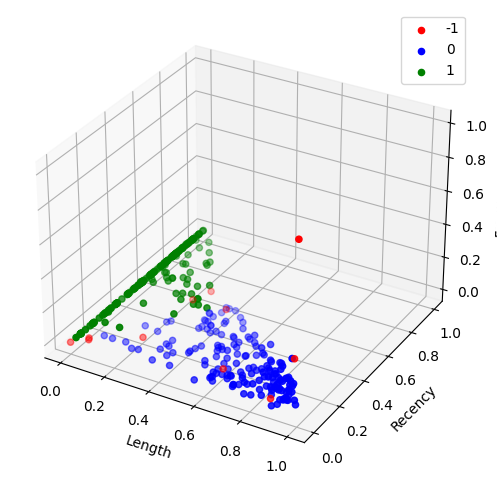

In [ ]:
fig = plt.figure(figsize=(12,6))
lrf_viz = fig.add_subplot(111, projection='3d')

colors = {-1: 'red', 0: 'blue', 1: 'green'}

for label, group in data_visualisasi.groupby('Label'):
  lrf_viz.scatter(group['Length'], group['Recency'], group['Frequency'], label=label, c=colors[label])

lrf_viz.set_xlabel('Length')
lrf_viz.set_ylabel('Recency')
lrf_viz.set_zlabel('Frequency')

lrf_viz.legend()

plt.show()

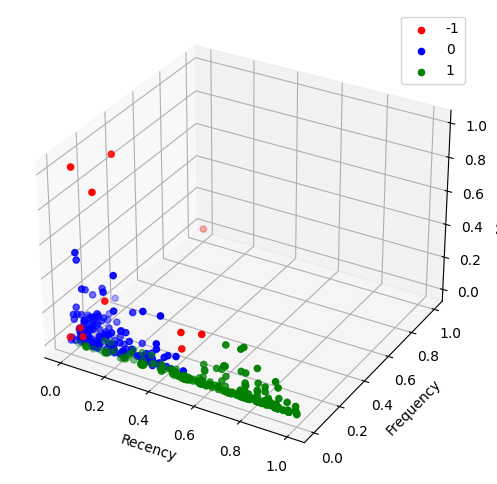

In [ ]:
fig = plt.figure(figsize=(12,6))
rfm_viz = fig.add_subplot(111, projection='3d')

colors = {-1: 'red', 0: 'blue', 1: 'green'}

for label, group in data_visualisasi.groupby('Label'):
  rfm_viz.scatter(group['Recency'], group['Frequency'], group['Monetary'],  label=label, c=colors[label])

rfm_viz.set_xlabel('Recency')
rfm_viz.set_ylabel('Frequency')
rfm_viz.set_zlabel('Monetary')

rfm_viz.legend()

plt.show()

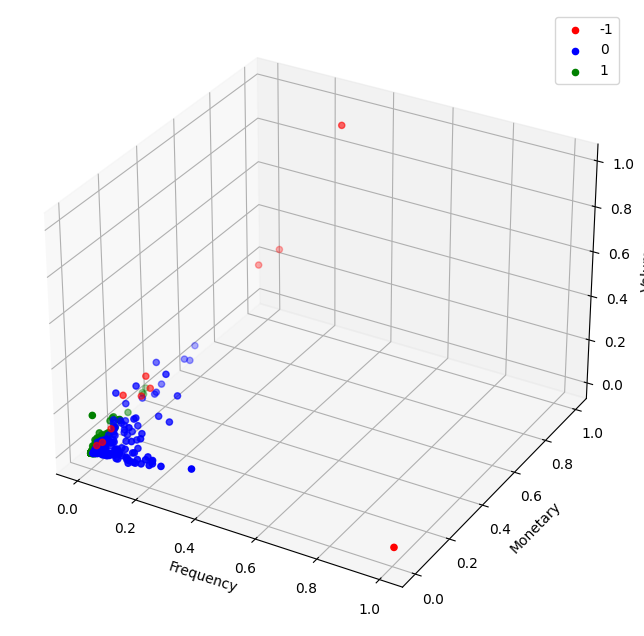

In [ ]:
fig = plt.figure(figsize=(12,8))
fmv_viz = fig.add_subplot(111, projection='3d')

colors = {-1: 'red', 0: 'blue', 1: 'green'}

for label, group in data_visualisasi.groupby('Label'):
  fmv_viz.scatter(group['Frequency'], group['Monetary'], group['Volume'],  label=label, c=colors[label])

fmv_viz.set_xlabel('Frequency')
fmv_viz.set_ylabel('Monetary')
fmv_viz.set_zlabel('Volume')

fmv_viz.legend()

plt.show()

## 2 Dimensi

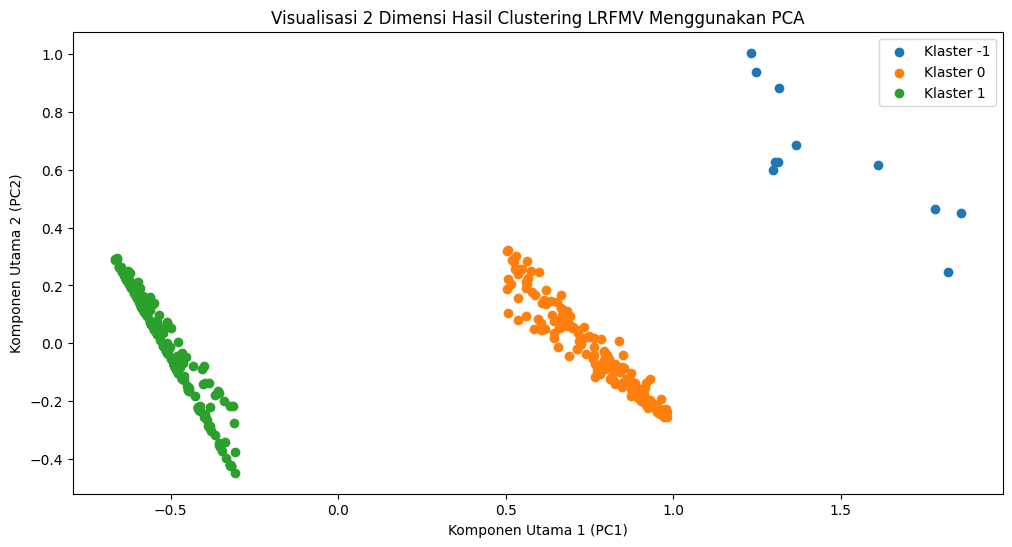

In [ ]:
pca = PCA(n_components=2)
two_d_viz = pca.fit_transform(data_visualisasi)

# data_visualisasi['Label'] = cluster_label

cluster_labels = clustering.labels_
colors = {-1: 'red', 0: 'blue', 1: 'green'}

# Membuat plot untuk data hasil reduksi dimensi
plt.figure(figsize=(12, 6))

# Plot data hasil reduksi dimensi
for cluster_label in range(-1,2):
  cluster_data = two_d_viz[cluster_labels == cluster_label]
  plt.scatter(cluster_data[:, 0], cluster_data[:, 1], label=f'Klaster {cluster_label}')

# plt.scatter(two_d_viz[:, 0], two_d_viz[:, 1], c=clustering.labels_ , cmap='viridis', marker='o', s=50, label='Data Hasil Reduksi Dimensi')

# Menambahkan label dan legenda
plt.xlabel('Komponen Utama 1 (PC1)')
plt.ylabel('Komponen Utama 2 (PC2)')
plt.title('Visualisasi 2 Dimensi Hasil Clustering LRFMV Menggunakan PCA')
plt.legend()

# Menampilkan plot
plt.show()

In [ ]:
# Mengakses matriks komponen utama
components_matrix = pca.components_

# Menampilkan atribut yang masuk ke dalam komponen utama 1 dan 2
component_1 = components_matrix[0]  # Komponen Utama 1
component_2 = components_matrix[1]  # Komponen Utama 2

print("Atribut yang Masuk ke dalam Komponen Utama 1:")
print(data_visualisasi.columns[component_1.argsort()[::-1]])

print("\nAtribut yang Masuk ke dalam Komponen Utama 2:")
print(data_visualisasi.columns[component_2.argsort()[::-1]])

Atribut yang Masuk ke dalam Komponen Utama 1:
Index(['Length', 'Monetary', 'Frequency', 'Volume', 'Recency', 'Label'], dtype='object')

Atribut yang Masuk ke dalam Komponen Utama 2:
Index(['Recency', 'Monetary', 'Volume', 'Frequency', 'Length', 'Label'], dtype='object')


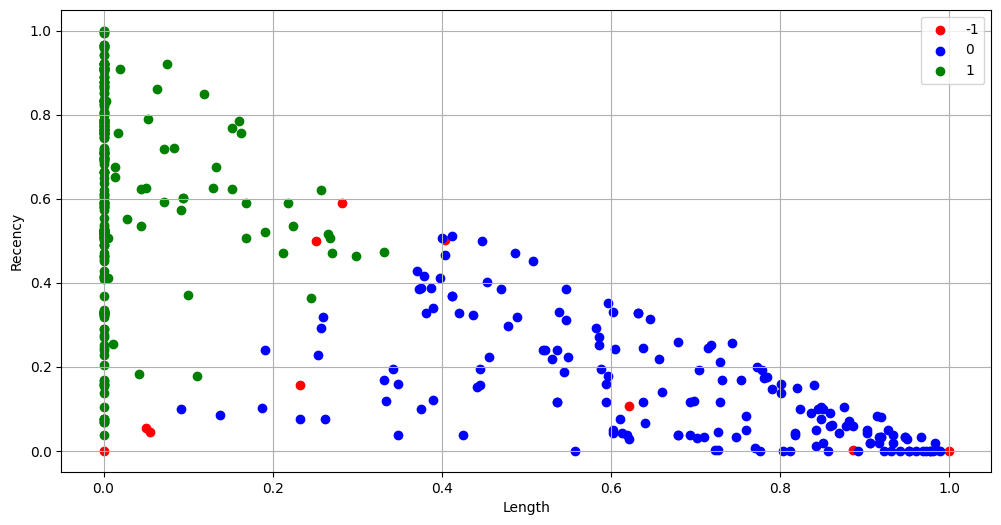

In [ ]:
fig = plt.figure(figsize=(12,6))

colors = {-1: 'red', 0: 'blue', 1: 'green'}

for label, group in data_visualisasi.groupby('Label'): #nama kolom kategori sesuaikan tekmu
  plt.scatter(group['Length'], group['Recency'],  label=label, c=colors[label]) #nama kolom fitur, s.index pisan sesuaino

# plt.title('Judul Visualisasi') #kei judul
plt.grid(True)
plt.xlabel('Length')
plt.ylabel('Recency')

plt.legend()

plt.show()

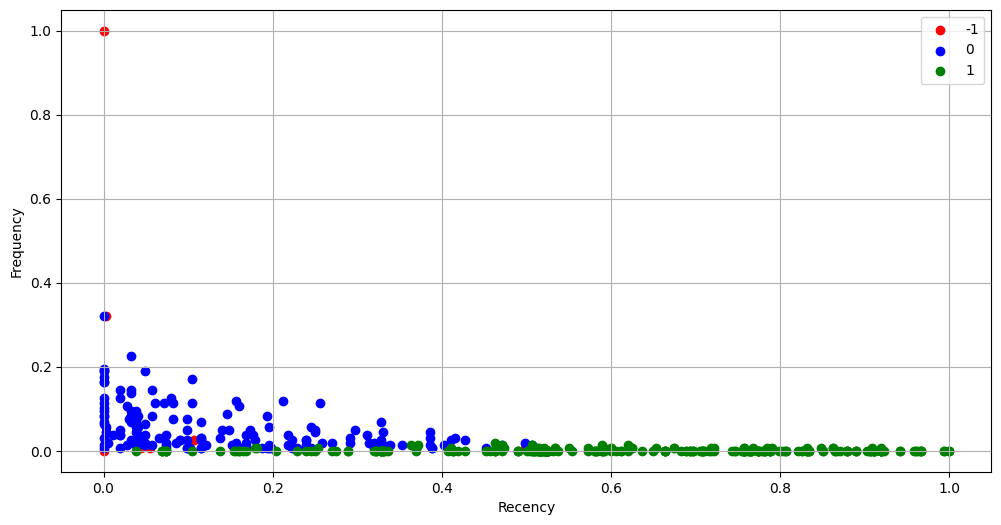

In [ ]:
fig = plt.figure(figsize=(12,6))

colors = {-1: 'red', 0: 'blue', 1: 'green'}

for label, group in data_visualisasi.groupby('Label'): #nama kolom kategori sesuaikan tekmu
  plt.scatter(group['Recency'], group['Frequency'],  label=label, c=colors[label]) #nama kolom fitur, s.index pisan sesuaino

# plt.title('Judul Visualisasi') #kei judul
plt.grid(True)
plt.xlabel('Recency')
plt.ylabel('Frequency')
plt.legend()

plt.show()

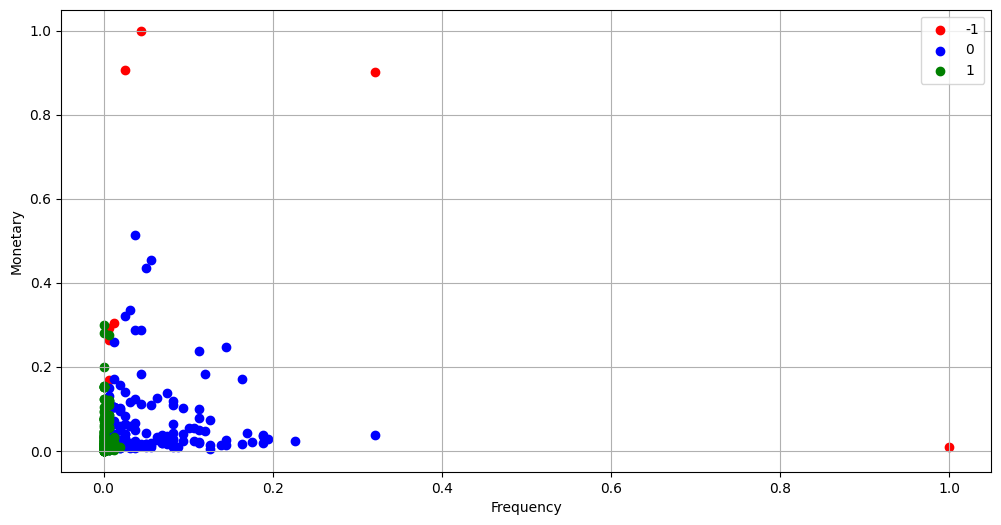

In [ ]:
fig = plt.figure(figsize=(12,6))

colors = {-1: 'red', 0: 'blue', 1: 'green'}

for label, group in data_visualisasi.groupby('Label'):
  plt.scatter(group['Frequency'], group['Monetary'],  label=label, c=colors[label])

# plt.title('Judul Visualisasi')
plt.grid(True)
plt.xlabel('Frequency')
plt.ylabel('Monetary')
plt.legend()

plt.show()

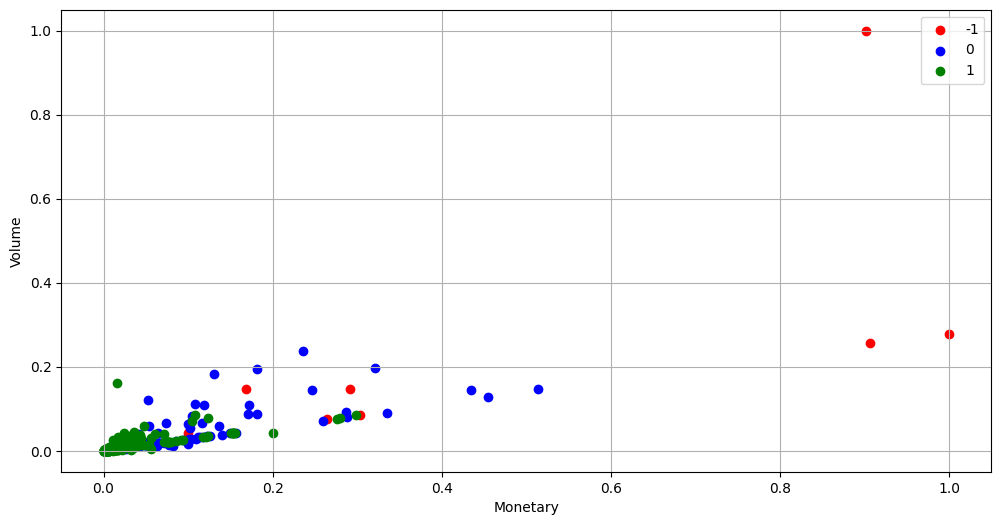

In [ ]:
fig = plt.figure(figsize=(12,6))

colors = {-1: 'red', 0: 'blue', 1: 'green'}

for label, group in data_visualisasi.groupby('Label'):
  plt.scatter(group['Monetary'], group['Volume'],  label=label, c=colors[label])


plt.grid(True)
plt.xlabel('Monetary')
plt.ylabel('Volume')
plt.legend()

plt.show()

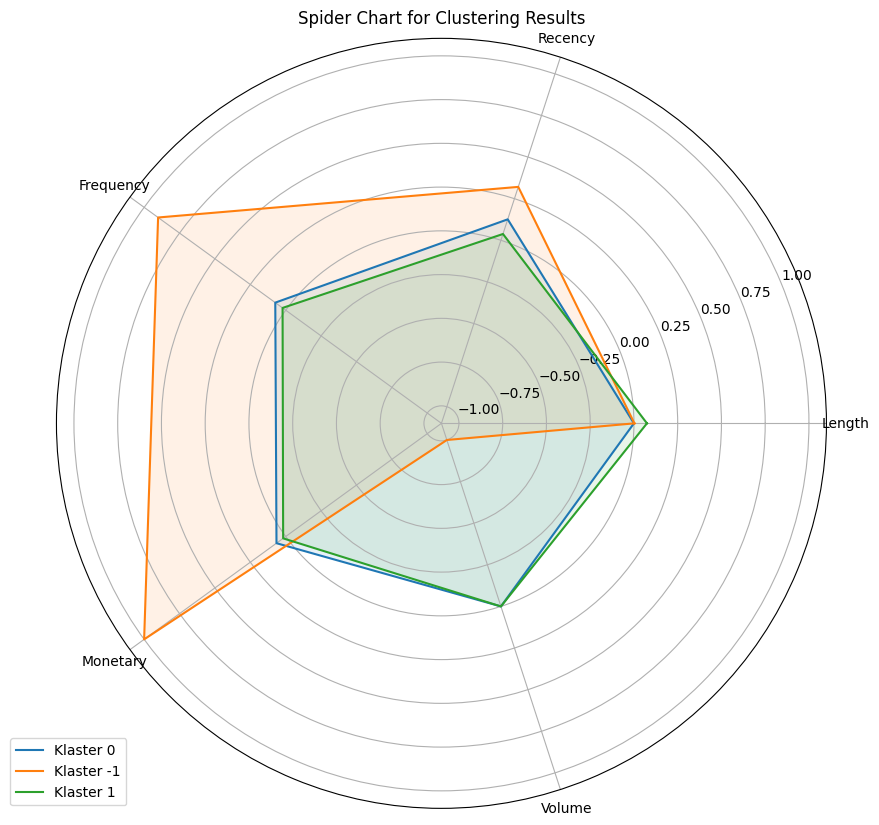

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Extract cluster labels and features from the DataFrame
clusters = data_visualisasi['Label'].unique()
features = data_visualisasi.columns[:-1]

# Number of clusters
num_clusters = len(clusters)

# Number of features
num_features = len(features)

# Create a figure with subplots
fig, ax = plt.subplots(figsize=(12,10), subplot_kw=dict(polar=True))

# Set the angle values for each feature
angles = np.linspace(0, 2 * np.pi, num_features, endpoint=False).tolist()
angles += angles[:1]

# Plot each cluster's data
for i in range(num_clusters):
    values = data_visualisasi.iloc[i, 1:].tolist()
    values += values[:1]  # Close the shape
    ax.plot(angles, values, label=f'Klaster {clusters[i]}')
    ax.fill(angles, values, alpha=0.1)

# Set the labels for each feature
ax.set_xticks(angles[:-1])
ax.set_xticklabels(features)

# Display the legend
ax.legend(loc='upper right', bbox_to_anchor=(0.1, 0.1))

# Show the plot
plt.title('Spider Chart for Clustering Results')
plt.show()

# Analisis Outlier

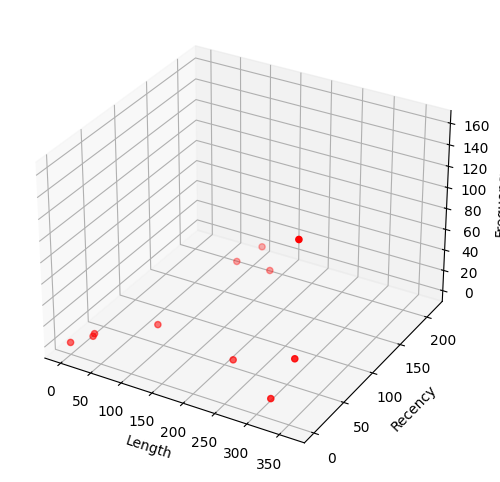

In [ ]:
fig = plt.figure(figsize=(12,6))
ax = fig.add_subplot(111, projection='3d')

ax.scatter(hasil_clustering_filtered_3['Length'], hasil_clustering_filtered_3['Recency'], hasil_clustering_filtered_3['Frequency'], c='r', marker='o')

ax.set_xlabel('Length')
ax.set_ylabel('Recency')
ax.set_zlabel('Frequency')

plt.show()

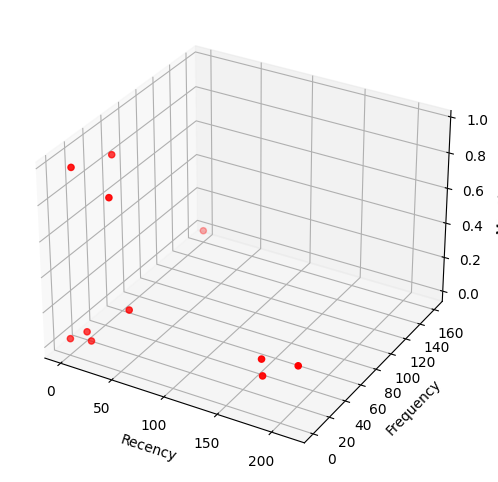

In [ ]:
fig = plt.figure(figsize=(12,6))
ax = fig.add_subplot(111, projection='3d')

ax.scatter(hasil_clustering_filtered_3['Recency'], hasil_clustering_filtered_3['Frequency'], hasil_clustering_filtered_3['Monetary'], c='r', marker='o')

ax.set_xlabel('Recency')
ax.set_ylabel('Frequency')
ax.set_zlabel('Monetary')

plt.show()

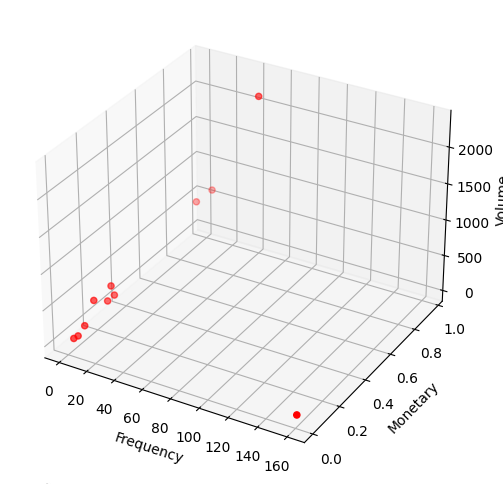

In [ ]:
fig = plt.figure(figsize=(12,6))
ax = fig.add_subplot(111, projection='3d')

ax.scatter(hasil_clustering_filtered_3['Frequency'], hasil_clustering_filtered_3['Monetary'], hasil_clustering_filtered_3['Volume'], c='r', marker='o')

ax.set_xlabel('Frequency')
ax.set_ylabel('Monetary')
ax.set_zlabel('Volume')

plt.show()